In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import random
import seaborn as sns
%matplotlib inline

In [ ]:
# load image data
# using the openml data as mldata is deprecated  
X, y = fetch_openml('mnist_784', return_X_y=True )

In [3]:
# split into train and test datasets, select a random subset
# for now, try 10% of the original data
n = len(X)
dataset_size = n // 10
indices = random.sample(list(range(n)), dataset_size)
X_sample = X[indices]
y_sample = y[indices]
x_train, x_test, y_train, y_test = train_test_split(X_sample, y_sample)

-----

BINARY CLASSIFICATION: LOGISTIC REGRESSION

In [4]:
# try binary classification first, identify 1s
# convert the outputs to a binary representation, 1 for ones and 0 otherwise  
binary_train = (y_train=='1').astype(int)
binary_test = (y_test=='1').astype(int)

log = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
fit = log.fit(x_train, binary_train)
score = log.score(x_test, binary_test)

In [5]:
# Confusion matrix methods
def build_confusion_matrix(fit, x_test, y_labels):
    predictions = fit.predict(x_test)
    cm = metrics.confusion_matrix(y_labels, predictions)
    return cm
  
def calculate_binary_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    sens = tp / (tp + fn) 
    spec = tn / (tn + fp)
    return (sens, spec)


def plot_confusion_matrix(cm, experiment_name=None, score=None):
    sens, spec = calculate_binary_metrics(cm)
    plt.figure(figsize=cm.shape)
    sns.heatmap(cm, annot=True, square = True, fmt="d", cbar=False, linewidths=2, cmap="Blues");
    plt.ylabel('Actual');
    plt.xlabel('Predicted');
    plt.text(2.2, 1.8, 'Sensitivity: {0:.6f}'.format(sens), fontsize=10)
    plt.text(2.2, 2, 'Specificity: {0:.6f}'.format(spec), fontsize=10)
    title = ''
    if experiment_name is not None:
        title = experiment_name + ': Confusion Matrix'
    if score is not None:
        title += ' (Score: {0:.6f})'.format(score)
    plt.title(title);
    plt.show()

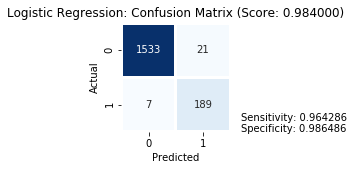

In [6]:
cm = build_confusion_matrix(fit, x_test, binary_test)
plot_confusion_matrix(cm, experiment_name='Logistic Regression', score=score)

In [7]:
# ROC Curve methods
def plot_roc_curve(fit, x_test, y_labels, experiment_name=None):
    fpr, tpr, thresholds = metrics.roc_curve(y_labels, fit.predict_proba(x_test)[:,1])
    plt.plot(fpr, tpr)
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(experiment_name + ': ROC Curve')
    plt.show()

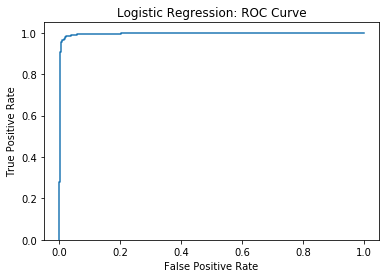

In [8]:
plot_roc_curve(fit, x_test, binary_test, 'Logistic Regression')

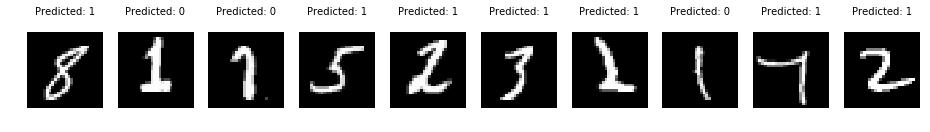

In [9]:
# Examples of classification mistakes
def show_classification_mistakes(predicted, truth, imageset, max_display=10, image_shape=(28,28)):
    incorrect_indices =  [i for i, j in enumerate(predicted - truth) if j != 0]
    display = min(max_display, len(incorrect_indices))
    plt.figure(figsize=(16,16))
    for i in range(display):
        index = incorrect_indices[i]
        label = predicted[index]
        plt.subplot(1,display,i+1)
        plt.axis('off')
        image = np.reshape(imageset[index], image_shape) 
        plt.imshow(image, cmap=plt.cm.gray)
        plt.title('Predicted: %i\n' % label, fontsize=10)
    
predictions = fit.predict(x_test)
show_classification_mistakes(predictions, binary_test, x_test)

-----
BINARY CLASSIFICATION: LDA

C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


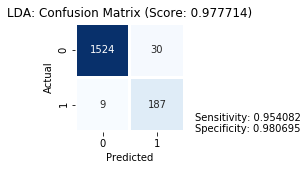

In [10]:
lda = LinearDiscriminantAnalysis()
fit_lda = lda.fit(x_train, binary_train)
cm = build_confusion_matrix(fit_lda, x_test, binary_test)
plot_confusion_matrix(cm, experiment_name='LDA', score=fit_lda.score(x_test,binary_test))

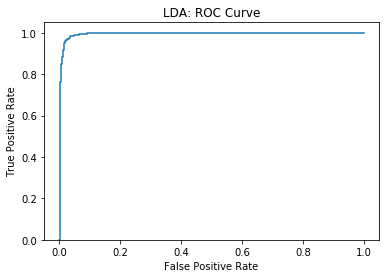

In [11]:
plot_roc_curve(fit_lda, x_test, binary_test, 'LDA')

-----
BINARY CLASSIFICATION: KNN

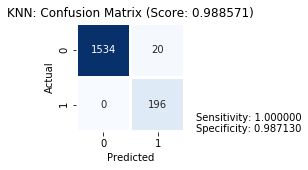

In [12]:
knn = KNeighborsClassifier()
fit_knn = knn.fit(x_train, binary_train)
cm = build_confusion_matrix(fit_knn, x_test, binary_test)
plot_confusion_matrix(cm, experiment_name='KNN', score=fit_knn.score(x_test,binary_test))

-----
BINARY CLASSIFICATION: INCREASING THE SAMPLE SIZE

In [13]:
# Build train and test sets from a given percentage of the full dataset
def build_binary_subsample(X, y, pct):
    n = len(X)
    dataset_size = int(np.floor(n * pct))
    indices = random.sample(list(range(n)), dataset_size)
    X_sample = X[indices]
    y_sample = y[indices]
    x_train, x_test, y_train, y_test = train_test_split(X_sample, y_sample)
    binary_train = (y_train=='1').astype(int)
    binary_test = (y_test=='1').astype(int)
    return x_train, x_test, binary_train, binary_test

Wall time: 5.99 s


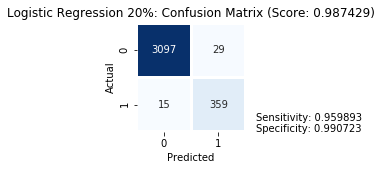

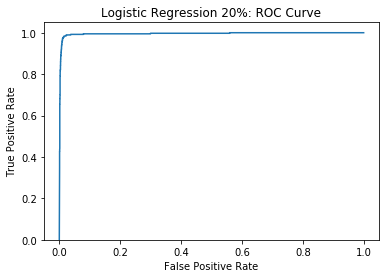

Wall time: 1.51 s


C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


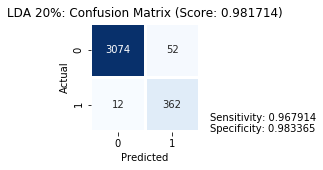

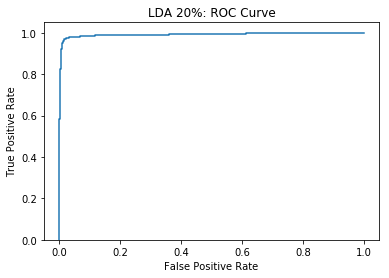

Wall time: 711 ms


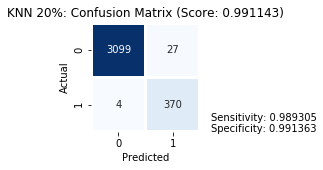

Wall time: 14.6 s


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


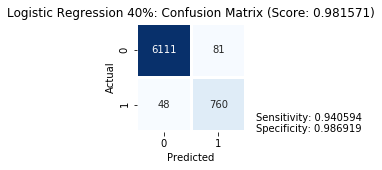

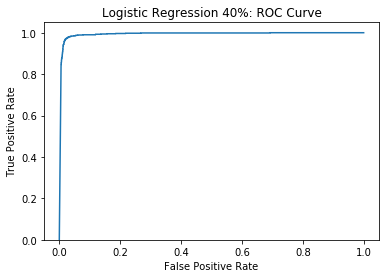

Wall time: 2.94 s


C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


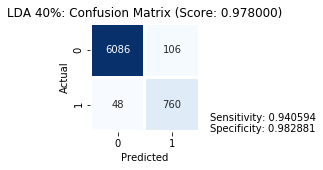

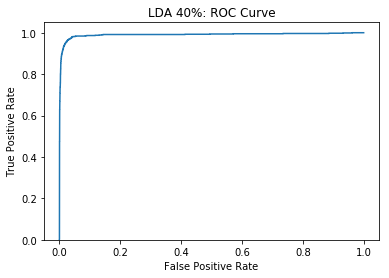

Wall time: 2.43 s


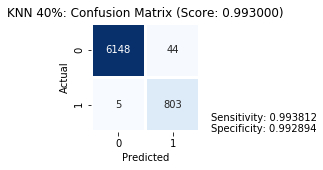

Wall time: 22.1 s


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


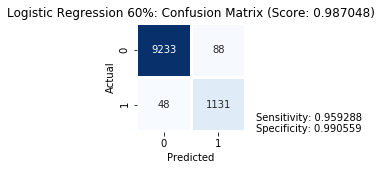

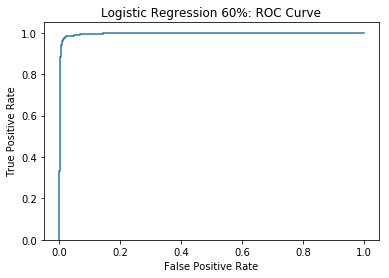

Wall time: 4.81 s


C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


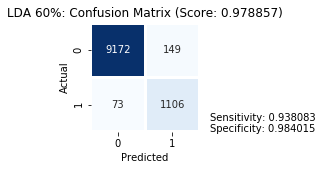

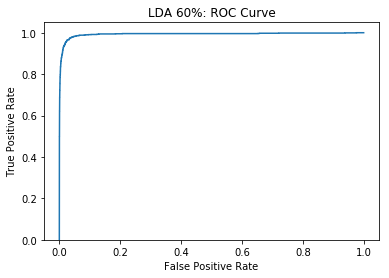

Wall time: 6.2 s


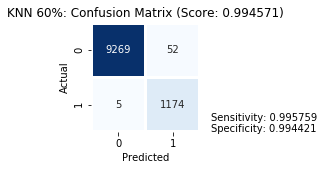

In [14]:
# Might take long time to run entirely depending on the sizes chosen
#sizes = [0.2, 0.4, 0.6]
sizes = [0.6]
for i in sizes:
    x_train, x_test, y_train, y_test = build_binary_subsample(X, y, i) 
    #Logistic regression
    log = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
    fit_log = log.fit(x_train, y_train)
    cm = build_confusion_matrix(fit_log, x_test, y_test)
    plot_confusion_matrix(cm, 'Logistic Regression ' + '{0:.0%}'.format(i), fit_log.score(x_test, y_test))
    plot_roc_curve(fit_log, x_test, y_test, 'Logistic Regression ' + '{0:.0%}'.format(i))
    #LDA
    lda = LinearDiscriminantAnalysis()
    fit_lda = lda.fit(x_train, y_train)
    cm = build_confusion_matrix(fit_lda, x_test, y_test)
    plot_confusion_matrix(cm, 'LDA ' + '{0:.0%}'.format(i), fit_lda.score(x_test,y_test))
    plot_roc_curve(fit_lda, x_test, y_test, 'LDA ' + '{0:.0%}'.format(i))
    #KNN, no ROC curve
    knn = KNeighborsClassifier()
    fit_knn = knn.fit(x_train, y_train)
    cm = build_confusion_matrix(fit_knn, x_test, y_test)
    plot_confusion_matrix(cm, 'KNN '+ '{0:.0%}'.format(i), fit_knn.score(x_test,y_test))

The accuracy of KNN improves with the training size while the accuracy for the other two algorithms decreases slightly. More training data in the KNN case will result in a more accurate clustering center whileas with the other algorithms it will make the boundary selection more difficult.    
However, in terms of time efficiency, KNN is the slowest. LDA and logistic regression run in comparable times with logistic regression having a slightly better prediction rate.     

----
CLUSTERING

In [21]:
y_labels = list(map(int, y_sample))
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_sample)
y_kmeans = kmeans.predict(X_sample)

In [121]:
# Compute performance of algorithm by calculating the proportion of points
# with the same label y in the 10 clusters identified by k-means
def compute_kmeans_accuracy(prediction, truth, n_clusters, n_labels):
    score_mat = np.zeros((n_clusters,n_labels)).astype(int)
    for i in range(n_clusters):
        indices =  [k for k, l in enumerate(prediction) if l == i]
        cluster_size = len(indices)
        for index in indices:
            label = truth[index]
            score_mat[i,label] += 1
    return score_mat

def plot_kmeans_accuracy(score_mat, n_clusters, score):
    plt.figure(figsize=score_mat.shape)
    sns.heatmap(score_mat, annot=True, square = True, fmt="d", cbar=False, linewidths=2, cmap="Blues");
    plt.ylabel('K-means cluster');
    plt.xlabel('Label');
    info = '(Clusters: {0:d},  Obj function: {1:.2f})'.format(n_clusters, score)
    plt.title('K-means accuracy ' + info)
    box_param=dict(facecolor='red', alpha=0.5)
    for i in range(n_clusters):
        max_index = np.argmax(score_mat[i])
        plt.text(score_mat.shape[1] + 0.2, i + 0.5, max_index, fontsize=12, bbox=box_param)
    plt.show()

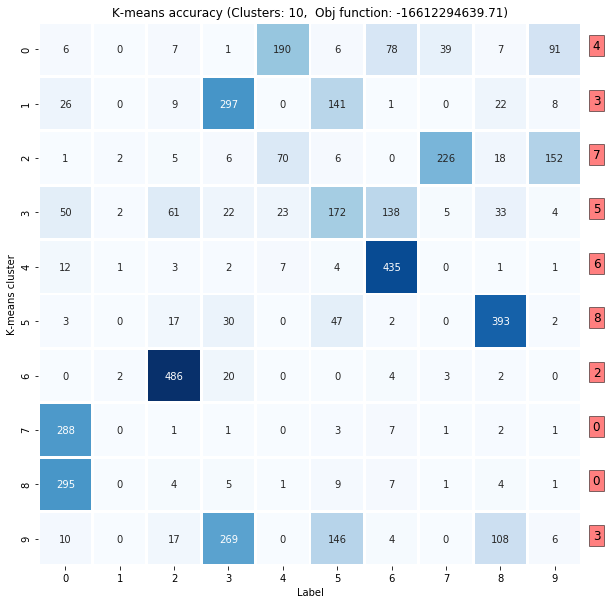

In [117]:
n_clusters = 10
n_labels = 10
score_mat = compute_kmeans_accuracy(y_kmeans, y_labels, n_clusters, n_labels)
plot_kmeans_accuracy(score_mat, n_clusters, kmeans.score(X_sample))

In [115]:
# Show a set of images given the image set and an indices array
def show_image_samples(imageset, indices, image_shape=(28,28)):
    plot_no = 1
    plt.figure(figsize=(16,16))
    for i in indices:
        plt.subplot(1,len(indices),plot_no)
        plt.axis('off')
        image = np.reshape(imageset[i], image_shape) 
        plt.imshow(image, cmap=plt.cm.gray)
        plot_no += 1
    plt.show()

# Get indices for images with the given label under a given cluster
def get_indices_label_cluster(y_kmeans, y_labels, cluster, label):
    indices =  [k for k, l in enumerate(y_kmeans) if l == cluster]
    result = [i for i in indices if y_labels[i]==label]
    return result

Cluster = 4, Label = 3


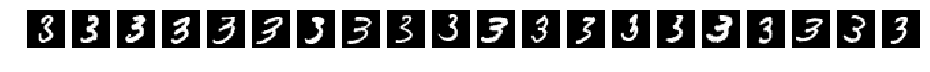

In [88]:
max_image_count = 20
cluster = 4
label = 3
print ('Cluster = ' + str(cluster) + ', Label = ' + str(label))
index_list = get_indices_label_cluster(y_kmeans, y_labels, cluster, label)
image_count = min(max_image_count, len(index_list))
indices = random.sample(index_list, image_count)
show_image_samples(X_sample, indices)

In [134]:
# Try with different number of clusters
n_labels = 10
trial_k = list(range(5,16))
results = []
for k in trial_k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_sample)
    score = kmeans.score(X_sample)
    results.append(-score)
    #y_kmeans = kmeans.predict(X_sample)
    #score_mat = compute_kmeans_accuracy(y_kmeans, y_labels, k, n_labels)
    #plot_kmeans_accuracy(score_mat, k, score)

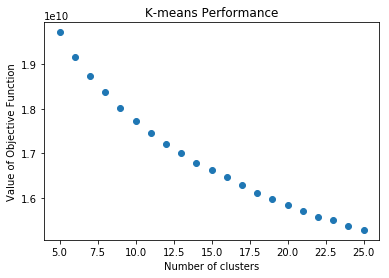

In [136]:
plt.scatter(trial_k, results)
plt.xlabel('Number of clusters')
plt.ylabel('Value of Objective Function')
plt.title('K-means Performance')
plt.show()

----
KNN + PCA

In [ ]:
from sklearn.decomposition import PCA

sizes = [0.1, 0.6]
for i in sizes:
    x_train, x_test, y_train, y_test = build_binary_subsample(X, y, i) 
    #PCA
    pca = PCA(n_components=2).fit(x_train)
    x_reduced = pca.transform(x_train)
    #KNN, no ROC curve
    knn = KNeighborsClassifier()
    fit_knn = knn.fit(x_reduced, y_train)
    cm = build_confusion_matrix(fit_knn, x_test, y_test)
    plot_confusion_matrix(cm, 'KNN + PCA '+ '{0:.0%}'.format(i), fit_knn.score(x_test,y_test))